In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split 

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
car_data = pd.read_csv("car_data.csv")
car_data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [3]:
train_input, test_input = train_test_split(car_data, test_size=0.33)


In [5]:
train_input = train_input[['Price', 'Mileage']]
train_x = train_input[['Mileage']]
train_y = train_input[['Price']]

In [6]:
test_input = test_input[['Price', 'Mileage']]
test_x = test_input[['Mileage']]
test_y = test_input[['Price']]

In [7]:
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
print('Coefficients: ', regr.coef_)
print(regr.score(test_x, test_y))

Coefficients:  [[-0.19153642]]
0.000337852050947


A negative correlation coefficient means that, for any two variables X and Y, an increase in X is associated with a decrease in Y. A negative correlation demonstrates a connection between two variables in the same way a positive correlation coefficient does, and the relative strengths are the same. -Lance explained this to me. I had to give him credit for it.

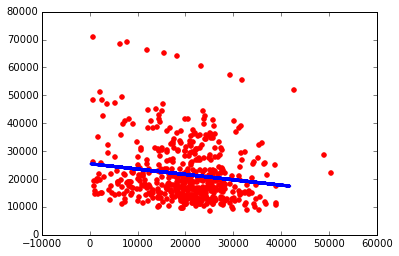

In [9]:
plt.scatter(train_x, train_y , color='red')
plt.plot(test_x, regr.predict(test_x), color='blue', linewidth=3)
plt.show()

Based on the r**2 coeffiecient and the score, linear regression is not a good fit for this data. 

In [11]:
regr.predict(10000)[0]

array([ 23550.44203194])

###Task 2

In [12]:
train1_input, test1_input = train_test_split(car_data, test_size=0.33)
train_input1 = train1_input[['Price', 'Mileage','Cylinder','Liter','Doors','Cruise',
                            'Sound','Leather']]
train1_x = train1_input[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
train1_y = train1_input[['Price']]

In [13]:
test_input1 = test1_input[['Price', 'Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
test1_x = test1_input[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
test1_y = test1_input[['Price']]

In [14]:
regr2 = linear_model.LinearRegression()
regr2.fit(train1_x, train1_y)
print('Coefficients: ', regr2.coef_)
print(regr2.score(test1_x, test1_y))

Coefficients:  [[ -2.02599428e-01   3.85864877e+03  -1.05388204e+03  -1.19168226e+03
    6.44457374e+03  -1.90425898e+03   3.42732718e+03]]
0.428414735281


In [15]:

train2_input, test2_input = train_test_split(car_data, test_size=0.33)
train_input2 = train2_input[['Price', 'Mileage','Cylinder','Liter','Doors','Cruise',
                            'Sound','Leather']]
train2_x = train2_input[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
train2_y = train2_input[['Price']]

In [16]:
test_input2 = test2_input[['Price', 'Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
test2_x = test2_input[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
test2_y = test2_input[['Price']]

This equation is not a good fit for this data.  There is not a strong correlation between Mileage, Cylinder, Liter, Doors, Cruise, Sound, Leather, and Price. The r**2 is .38.


Now, I am going to change the features in order to try and find the best predictor for price.

In [17]:
import itertools
dependent_vars = list(car_data.columns)
dependent_vars.remove('Price')
combos = list(itertools.combinations(dependent_vars, 2))

In [18]:
choices = []
def regression_for(combo):
    combo = list(combo)
    df = car_data.loc[:, combo + ['Price']]
    df.dropna(inplace=True)
    x_data = df[combo]
    price = df['Price']
    regr4 = linear_model.LinearRegression()
    regr4.fit(train2_x, train2_y)
    return regr4, regr4.score(test2_x, test2_y)

for combo in combos:
    regr4, score = regression_for(combo)
    choices.append((combo, score))
    
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr4, score = regression_for(best[0])
print(regr4.coef_,regr4.intercept_)

(('Sound', 'Leather'), 0.40583028882620997)
[[ -1.52945623e-01   4.42613873e+03  -1.19912116e+03  -1.62194850e+03
    5.91150978e+03  -2.00453853e+03   3.72085219e+03]] [ 4781.5892603]


In [19]:

train3_input, test3_input = train_test_split(car_data, test_size=0.33)
train_input3 = train3_input[['Price','Sound','Leather']]
train3_x = train3_input[['Sound','Leather']]
train3_y = train3_input[['Price']]

In [20]:
test_input3 = test3_input[['Price','Sound','Leather']]
test3_x = test3_input[['Sound','Leather']]
test3_y = test3_input[['Price']]

I was having trouble finding the best predictor for price. I know when your not including cylinder or liter the correlation drastically decreases. 

In [21]:
regr3 = linear_model.LinearRegression()
regr3.fit(train3_x, train3_y)
print('Coefficients: ', regr3.coef_)
print(regr3.score(test3_x, test3_y))

Coefficients:  [[-4234.99690466  4087.23409532]]
0.00132164417007
